# Introduction

The National Longitudinal Survey of Youth 1997-2011 dataset is one of the most important databases available to social scientists working with US data. 

It allows scientists to look at the determinants of earnings as well as educational attainment and has incredible relevance for government policy. It can also shed light on politically sensitive issues like how different educational attainment and salaries are for people of different ethnicity, sex, and other factors. When we have a better understanding how these variables affect education and earnings we can also formulate more suitable government policies. 

<center><img src=https://img.freepik.com/premium-vector/office-workers-exercising-workplace-concept-male-female-characters-doing-workout-work-place-squatting-stretching-body-arms-legs-health-care-cartoon-people-vector-illustration_87771-12364.jpg?w=2000 height=400></center>


### Upgrade Plotly

In [4]:
%pip install --upgrade plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 4.6 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: plotly
    Found existing installation: plotly 5.12.0
    Uninstalling plotly-5.12.0:
      Successfully uninstalled plotly-5.12.0
--- Logging error ---
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py", line 177, in emit
    self.console.print(renderable, overflow="ignore", crop=False, style=style)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1673, in print
    extend(render(renderable, render_options))
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_vendor/rich/console.py", line 1305, in render
    for render_output in iter_render:
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/pip/_internal/utils/logging.py

###  Import Statements


In [5]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

## Notebook Presentation

In [6]:
pd.options.display.float_format = '{:,.2f}'.format

# Load the Data



In [7]:
df_data = pd.read_csv('NLSY97_subset.csv')

### Understanding the Dataset

You can take a look at the file : `NLSY97_Variable_Names_and_Descriptions.csv`. 

---------------------------

    :Key Variables:  
      1. S           Years of schooling (highest grade completed as of 2011)
      2. EXP         Total out-of-school work experience (years) as of the 2011 interview.
      3. EARNINGS    Current hourly earnings in $ reported at the 2011 interview

# Preliminary Data Exploration 🔎



* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [8]:
df_data.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [9]:
df_data.count()

ID          2000
EARNINGS    2000
S           2000
EXP         2000
FEMALE      2000
            ... 
MSA11NO     2000
MSA11NCC    2000
MSA11CC     2000
MSA11NK     2000
MSA11NIC    2000
Length: 96, dtype: int64

In [10]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 96 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   ID        2000 non-null   int64  
 1   EARNINGS  2000 non-null   float64
 2   S         2000 non-null   int64  
 3   EXP       2000 non-null   float64
 4   FEMALE    2000 non-null   int64  
 5   MALE      2000 non-null   int64  
 6   BYEAR     2000 non-null   int64  
 7   AGE       2000 non-null   int64  
 8   AGEMBTH   1956 non-null   float64
 9   HHINC97   1630 non-null   float64
 10  POVRAT97  1627 non-null   float64
 11  HHBMBF    2000 non-null   int64  
 12  HHBMOF    2000 non-null   int64  
 13  HHOMBF    2000 non-null   int64  
 14  HHBMONLY  2000 non-null   int64  
 15  HHBFONLY  2000 non-null   int64  
 16  HHOTHER   2000 non-null   int64  
 17  MSA97NO   2000 non-null   int64  
 18  MSA97NCC  2000 non-null   int64  
 19  MSA97CC   2000 non-null   int64  
 20  MSA97NK   2000 non-null   int6

In [11]:
print(f"The Data frame has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")

The Data frame has 2000 rows and 96 columns.


## Data Cleaning - Check for Missing Values and Duplicates



In [12]:
# Drop duplicates except the first occurence
clean_df = df_data.drop_duplicates(keep="first")

In [14]:
print(f"The Data frame has {clean_df.shape[0]} rows and {clean_df.shape[1]} columns.")

The Data frame has 1487 rows and 96 columns.


## Descriptive Statistics

In [15]:
clean_df.describe()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
count,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,453.00","1,205.00",...,"1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00","1,487.00"
mean,"3,547.13",18.81,14.56,6.70,0.49,0.51,"1,982.07",28.93,26.32,"58,310.67",...,0.78,0.16,0.27,0.34,0.23,0.05,0.54,0.41,0.00,0.00
std,"2,009.84",12.00,2.77,2.86,0.50,0.50,1.38,1.38,5.08,"43,868.05",...,0.43,0.36,0.44,0.47,0.42,0.21,0.50,0.49,0.04,0.00
min,1.00,2.00,6.00,0.00,0.00,0.00,"1,980.00",27.00,12.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,"1,888.00",11.41,12.00,4.65,0.00,0.00,"1,981.00",28.00,23.00,"32,000.00",...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,"3,474.00",15.75,15.00,6.63,0.00,1.00,"1,982.00",29.00,26.00,"50,500.00",...,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00
75%,"5,160.50",22.60,16.00,8.71,1.00,1.00,"1,983.00",30.00,30.00,"72,000.00",...,1.00,0.00,1.00,1.00,0.00,0.00,1.00,1.00,0.00,0.00
max,"8,980.00",132.89,20.00,14.73,1.00,1.00,"1,984.00",31.00,45.00,"246,474.00",...,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,0.00


In [16]:
print(f"The average earnings per hour of the population is ${'{:.2f}'.format(clean_df.describe().EARNINGS['mean'])}")

The average earnings per hour of the population is $18.81


# Visualise the Features

### Male vs Female Comparison


In [17]:
# Create a data frame where the male column equals to 1
males_df = clean_df.loc[df_data.MALE == 1]

In [18]:
print(f"The highest amount of hourly earnings by a male: ${males_df.EARNINGS.max()}")

The highest amount of hourly earnings by a male: $132.89


In [19]:
# Create a data frame where the female column equals to 1
females_df = clean_df.loc[df_data.FEMALE == 1]

In [20]:
print(f"The highest amount of hourly earnings by a female: ${females_df.EARNINGS.max()}")

The highest amount of hourly earnings by a female: $96.15


In [21]:
male_avg = males_df.EARNINGS.mean()
print(f"The average male earnings per hour is: ${'{:.2f}'.format(male_avg)}")

The average male earnings per hour is: $20.20


In [22]:
female_avg = females_df.EARNINGS.mean()
print(f"The average male earnings per hour is: ${'{:.2f}'.format(female_avg)}")

The average male earnings per hour is: $17.34


In [497]:
perc_diff = ((male_avg - female_avg) / ((male_avg+female_avg)/2)) * 100
print(f"The percentage difference between the male and female average hourly pay is : {'{:.2f}'.format(perc_diff)}%")

The percentage difference between the male and female avera ge hourly pay is : 15.24%


### Hours worked per week 

In [24]:
male_hrs_avg = males_df.HOURS.mean()
print(f"This is the average number of hours worked per week by males: {'{:.2f}'.format(male_hrs_avg)} hrs")

This is the average number of hours worked per week by males: 40.75 hrs


In [25]:
female_hrs_avg = females_df.HOURS.mean()
print(f"This is the average number of hours worked per week by females: {'{:.2f}'.format(female_hrs_avg)} hrs")

This is the average number of hours worked per week by females: 37.37 hrs


### Years spent in School


In [26]:
male_s_avg = males_df.S.mean()
print(f"This is the average number of years spent in school by males: {'{:.2f}'.format(male_s_avg)} years")

This is the average number of years spent in school by males: 14.12 years


In [27]:
female_s_avg = females_df.S.mean()
print(f"This is the average number of years spent in school by females: {'{:.2f}'.format(female_s_avg)} years")

This is the average number of years spent in school by females: 15.02 years


### Summary and analysis 
As we can see the males on average the males spent less time in school than the females, but still on average earn 15.4% less than men. Does that indicate that the number of years spent in school is not a good predictor of average hourly earnings.
Also, it is shown on average that males work longer hours than females, could that be a reason for the disparity of "15.4%" or just due to the career paths and qualifications chosen?
Let's plot some chart to visualize the dataset!!!

In [28]:
# Creating a subset of the dataset
edu_col_subset = ['EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO']
edu_df = clean_df[edu_col_subset]

In [29]:
edu_df.head()

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0
2,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0
4,0,0,0,0,0,1,0,0


In [376]:
# Summing the number of people that have each degree qualification
gen_degrees = edu_df.sum()

In [377]:
gen_degrees.values

array([ 22,   4, 119, 454, 135, 586, 110,  57])

In [378]:
# Bar chart of all the Degree Qualifications 
bar = px.bar(
   x = gen_degrees.index,
   y = gen_degrees.values,
   title = "Number of Highest Degree Qualification", 
   color = gen_degrees.index
)
bar.update_layout(
    xaxis_title = "Degree Qualification",
    yaxis_title = "Number of Persons"
)
bar.show()

In [32]:
# Create a series based of of sex
SEX = np.where(clean_df.MALE == 1, "Male", "Female")

In [33]:
print(SEX)

['Male' 'Male' 'Male' ... 'Female' 'Female' 'Female']


In [34]:
clean_df.head()

,ID,EARNINGS,S,EXP,FEMALE,MALE,BYEAR,AGE,AGEMBTH,HHINC97,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,0,1,1984,27,24.00,"64,000.00",...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,0,1,1982,29,32.00,"6,000.00",...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,0,1,1981,30,23.00,"88,252.00",...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,0,1,1983,28,30.00,NaN,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,0,1,1984,27,23.00,"44,188.00",...,1,0,0,0,1,0,0,1,0,0


In [35]:
# Insert "SEX" series into the data frame
clean_df.insert(loc = 4, column="SEX", value = SEX )

In [36]:
clean_df.sample(10)

,ID,EARNINGS,S,EXP,SEX,FEMALE,MALE,BYEAR,AGE,AGEMBTH,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
1133,4818,34.19,16,5.65,Male,0,1,1984,27,27.00,...,1,1,0,0,0,0,0,1,0,0
1405,507,6.67,14,8.73,Female,1,0,1984,27,27.00,...,1,0,0,1,0,0,1,0,0,0
234,4441,17.36,18,3.63,Male,0,1,1984,27,29.00,...,1,0,0,0,1,0,1,0,0,0
1053,5751,37.50,12,9.90,Male,0,1,1983,28,25.00,...,0,0,0,1,0,1,0,0,0,0
513,4668,20.93,12,8.71,Male,0,1,1982,29,17.00,...,1,0,0,0,1,0,1,0,0,0
281,1144,18.00,9,10.46,Female,1,0,1983,28,23.00,...,0,1,0,0,0,0,1,0,0,0
215,1202,13.00,12,9.21,Male,0,1,1981,30,21.00,...,1,0,1,0,0,0,0,1,0,0
799,4287,8.33,14,2.21,Female,1,0,1984,27,23.00,...,1,0,0,1,0,0,0,1,0,0
607,5651,9.00,12,10.06,Male,0,1,1981,30,24.00,...,1,0,0,1,0,0,1,0,0,0
1164,6003,36.54,16,5.94,Male,0,1,1984,27,29.00,...,1,0,0,0,1,0,0,1,0,0


In [37]:
# Create a subset of the data frame by grouping the values based on "SEX" and "EDUCDO" and count the values.
educdo_by_sex = clean_df.groupby(["SEX", "EDUCDO"],as_index = False ).agg({'EDUCDO': pd.Series.count})

In [38]:
educdo_by_sex.head()

,SEX,EDUCDO
0,Female,709
1,Female,17
2,Male,721
3,Male,40


In [445]:
# Chart of High School drop outs Males Vs Females
bar = px.bar(
   x = educdo_by_sex.SEX,
   y = educdo_by_sex.EDUCDO,
   title = "High School Drop out (Top - Yes | Bottom - No)", 
   color = educdo_by_sex.EDUCDO,
   hover_name= educdo_by_sex.SEX,
   color_continuous_scale="agsunset"
)
bar.update_layout(
    xaxis_title = "Degree Qualification",
    yaxis_title = "Gender"
)
bar.show()

In [391]:
# Create a subset of the data frame by grouping the values based on "SEX" and "EDUCHSD" and count the values.
educhsd_by_sex = clean_df.groupby(["SEX", "EDUCHSD"], as_index=False).agg({"EDUCHSD": pd.Series.count})

In [392]:
educhsd_by_sex.head()

,SEX,EDUCHSD
0,Female,164
1,Female,77
2,Male,148
3,Male,103


In [446]:
# Chart of persons that achieved a High School Diploma : Males Vs Females
bar = px.bar(
   x = educhsd_by_sex.SEX,
   y = educhsd_by_sex.EDUCHSD,
   title = "Highest Qualification - High School Diploma. (Top - Yes | Bottom - No)", 
   color = educhsd_by_sex.EDUCHSD,
   hover_name= educhsd_by_sex.SEX,
   color_continuous_scale="agsunset"
)
bar.update_layout(
    yaxis_title = "Degree Qualification",
    xaxis_title = "Gender"
)
bar.show()

In [401]:
# Create a subset of the data frame by grouping the values based on "SEX" and "EDUCGED" and count the values.

educged_by_sex = clean_df.groupby(["SEX", "EDUCGED"], as_index=False).agg({"EDUCGED": pd.Series.count})

In [402]:
educged_by_sex.head()

,SEX,EDUCGED
0,Female,231
1,Female,10
2,Male,233
3,Male,18


In [447]:
# Chart of persons that achieved a General Education Development Certificate : Males Vs Females
bar = px.bar(
    x = educged_by_sex.SEX,
    y = educged_by_sex.EDUCGED,
    color= educged_by_sex.EDUCGED,
    hover_name= educged_by_sex.SEX,
    title = "General Educational Development certificate (HSD equivalence) (Top - Yes | Bottom - No)", 
    color_continuous_scale="agsunset"
)

bar.update_layout(
    xaxis_title = "Gender",
    yaxis_title = "Degree Qualification",
)
bar.show()

In [410]:
# Create a subset of the data frame by grouping the values based on "SEX" and "EDUCAA" and count the values.

educaa_by_sex = clean_df.groupby(["SEX", "EDUCAA"],as_index = False ).agg({'EDUCAA': pd.Series.count})

In [411]:
educaa_by_sex.head()

,SEX,EDUCAA
0,Female,226
1,Female,15
2,Male,226
3,Male,25


In [448]:
# Chart of persons that achieved a High School Diploma : Males Vs Females
bar = px.bar(
    x = educaa_by_sex.SEX,
    y = educaa_by_sex.EDUCAA,
    color= educaa_by_sex.EDUCAA,
    title = "Associate's (two-year college) degree (Top - Yes | Bottom - No)", 
    color_continuous_scale="agsunset"
)


bar.update_layout(
    xaxis_title = "Gender",
    yaxis_title = "Degree Qualification",
)

bar.show()

In [416]:
# Create a subset of the data frame by grouping the values based on "SEX" and "EDUCBA" and count the values.

educba_by_sex = clean_df.groupby(["SEX", "EDUCBA"],as_index = False ).agg({'EDUCBA': pd.Series.count})

In [417]:
educba_by_sex.head()

,SEX,EDUCBA
0,Female,135
1,Female,106
2,Male,180
3,Male,71


In [449]:
# Chart of persons that achieved a Bachelor's Degree : Males Vs Females
bar = px.bar(
    x = educba_by_sex.SEX,
    y = educba_by_sex.EDUCBA,
    color= educba_by_sex.EDUCBA,
    title = "Bachelor's degree (Top - Yes | Bottom - No)", 
    color_continuous_scale="agsunset"
)


bar.update_layout(
    xaxis_title = "Gender",
    yaxis_title = "Degree Qualification",
)

bar.show()

In [419]:
# Create a subset of the data frame by grouping the values based on "SEX" and "EDUCMAST" and count the values.

educmast_by_sex = clean_df.groupby(["SEX", "EDUCMAST"],as_index = False ).agg({'EDUCMAST': pd.Series.count})

In [420]:
educmast_by_sex.head()

,SEX,EDUCMAST
0,Female,216
1,Female,25
2,Male,232
3,Male,19


In [450]:
# Chart of persons that achieved a Master's Degree : Males Vs Females
bar = px.bar(
    x = educmast_by_sex.SEX,
    y = educmast_by_sex.EDUCMAST,
    color= educmast_by_sex.EDUCMAST,
    title = "Master's Degree (Top - Yes | Bottom - No)", 
    color_continuous_scale="agsunset"
)


bar.update_layout(
    xaxis_title = "Gender",
    yaxis_title = "Degree Qualification",
)

bar.show()

In [428]:
# Create a subset of the data frame by grouping the values based on "SEX" and "EDUCPROF" and count the values.
educprof_by_sex = clean_df.groupby(["SEX", "EDUCPROF"],as_index = False ).agg({'EDUCPROF': pd.Series.count})

In [429]:
educprof_by_sex.head()

,SEX,EDUCPROF
0,Female,237
1,Female,4
2,Male,247
3,Male,4


In [451]:
# Chart of persons that achieved a Proffesional Degree : Males Vs Females
bar = px.bar(
    x = educprof_by_sex.SEX,
    y = educprof_by_sex.EDUCPROF,
    color= educprof_by_sex.EDUCPROF,
    title = "Proffesional Degree (Top - Yes | Bottom - No)", 
    color_continuous_scale="agsunset"
)


bar.update_layout(
    xaxis_title = "Gender",
    yaxis_title = "Degree Qualification",
)

bar.show()

## Categorisation based on Race.

In [472]:
# Series of the sum of each ethnicity.
clean_df[["ETHBLACK", "ETHHISP", "ETHWHITE"]].sum() 

ETHBLACK     35
ETHHISP      47
ETHWHITE    410
dtype: int64

In [463]:
# Dataframe of the rows which are of the ethnicity, BLACK
black_df = clean_df[clean_df.ETHBLACK == 1]

In [464]:
# Subset of the degrees in the black_df
edu_black_df = black_df[['EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO']]


In [467]:
edu_black_df.head()

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
19,0,0,0,0,0,1,0,0
39,0,0,0,0,0,1,0,0
43,0,0,0,0,0,1,0,0
80,0,0,0,0,0,1,0,0
134,0,0,1,0,0,0,0,0


In [468]:
# Sum of persons with each degree qualification.
b_gen_degrees = edu_black_df.sum()

In [469]:
b_gen_degrees

EDUCPROF     0
EDUCPHD      0
EDUCMAST     2
EDUCBA      12
EDUCAA       1
EDUCHSD     16
EDUCGED      3
EDUCDO       1
dtype: int64

In [494]:
# Bar chart plotting the proportion (percentage) of BLACK people with each qualifications.
bar = px.bar(
   x = b_gen_degrees.index,
   y = (b_gen_degrees.values / 35) * 100,
   title = "Proportion of Highest Degree Qualification - ( Ethnicity - Black )", 
   color = b_gen_degrees.index
)
bar.update_layout(
    xaxis_title = "Degree Qualification",
    yaxis_title = "Proportion of Persons (%)"
)
bar.show()

In [459]:
edu_by_rel.sum()

ETHBLACK     35
ETHHISP      47
ETHWHITE    410
dtype: int64

In [474]:
# Dataframe of the rows which are of the ethnicity, HISPANIC
hispanic_df = clean_df[clean_df.ETHHISP == 1]

In [476]:
# Subset of the degrees in the hisp_df
edu_hisp_df = hispanic_df[['EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO']]

In [479]:
edu_hisp_df.head()

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
139,0,0,0,0,0,1,0,0
188,0,0,0,0,1,0,0,0
192,0,0,0,0,0,1,0,0
216,0,0,0,0,0,1,0,0
245,0,0,0,0,0,1,0,0


In [480]:
# Sum of persons with each degree qualification.
h_gen_degrees = edu_hisp_df.sum()

In [481]:
h_gen_degrees

EDUCPROF     0
EDUCPHD      0
EDUCMAST     6
EDUCBA      10
EDUCAA       5
EDUCHSD     21
EDUCGED      4
EDUCDO       1
dtype: int64

In [495]:
# Bar chart plotting the proportion (percentage) of HISPANIC people with each qualifications.
bar = px.bar(
   x = h_gen_degrees.index,
   y = (h_gen_degrees.values / 47) * 100,
   title = "Proportion of Highest Degree Qualification - ( Ethnicity - Hispanic )", 
   color = h_gen_degrees.index
)
bar.update_layout(
    xaxis_title = "Degree Qualification",
    yaxis_title = "Proportion of Persons (%)"
)
bar.show()

In [485]:
# Dataframe of the rows which are of the ethnicity, WHITE
white_df = clean_df[clean_df.ETHWHITE == 1]

In [486]:
# Subset of the degrees in the white_df
edu_white_df = white_df[['EDUCPROF', 'EDUCPHD', 'EDUCMAST', 'EDUCBA', 'EDUCAA', 'EDUCHSD', 'EDUCGED', 'EDUCDO']]

In [487]:
edu_white_df.head()

,EDUCPROF,EDUCPHD,EDUCMAST,EDUCBA,EDUCAA,EDUCHSD,EDUCGED,EDUCDO
0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,1,0,0
5,0,0,0,0,0,1,0,0
6,0,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0,0


In [490]:
# Sum of persons with each degree qualification.
w_gen_degrees = edu_white_df.sum()

In [491]:
w_gen_degrees

EDUCPROF      8
EDUCPHD       1
EDUCMAST     36
EDUCBA      155
EDUCAA       34
EDUCHSD     143
EDUCGED      21
EDUCDO       12
dtype: int64

In [496]:
# Bar chart plotting the proportion (percentage) of WHITE people with each qualifications.
bar = px.bar(
   x = w_gen_degrees.index,
   y = (w_gen_degrees.values / 410) * 100,
   title = "Proportion of Highest Degree Qualification - ( Ethnicity - White )", 
   color = w_gen_degrees.index
)
bar.update_layout(
    xaxis_title = "Degree Qualification",
    yaxis_title = "Proportion of Persons (%)"
)
bar.show()

# Split Training & Test Dataset

We *can't* use all the entries in our dataset to train our model. Keep 20% of the data for later as a testing dataset (out-of-sample data).  

In [43]:
clean_df.head()

,ID,EARNINGS,S,EXP,SEX,FEMALE,MALE,BYEAR,AGE,AGEMBTH,...,URBAN,REGNE,REGNC,REGW,REGS,MSA11NO,MSA11NCC,MSA11CC,MSA11NK,MSA11NIC
0,4275,18.50,12,9.71,Male,0,1,1984,27,24.00,...,1,0,0,1,0,0,0,1,0,0
1,4328,19.23,17,5.71,Male,0,1,1982,29,32.00,...,2,0,0,1,0,0,1,0,0,0
2,8763,39.05,14,9.94,Male,0,1,1981,30,23.00,...,1,0,0,0,1,0,0,1,0,0
3,8879,16.80,18,1.54,Male,0,1,1983,28,30.00,...,1,0,1,0,0,0,1,0,0,0
4,1994,36.06,15,2.94,Male,0,1,1984,27,23.00,...,1,0,0,0,1,0,0,1,0,0


In [44]:
clean_df.dropna(inplace=True)

/var/folders/87/wsx1d69j1sxg_d_mgv8_zx100000gn/T/ipykernel_54629/283665261.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [45]:
# Creating the feature and target
features = np.array(clean_df.S).reshape(-1,1)
target = clean_df.EARNINGS

In [46]:
# Splitting the data set
X_train, X_test, y_train, y_test = train_test_split(features, target, 
random_state = 10, 
test_size= 0.2
)

# Simple Linear Regression

Only use the years of schooling to predict earnings. Use sklearn to run the regression on the training dataset. How high is the r-squared for the regression on the training data? 

In [47]:
# Create linear regression object
s_regr = LinearRegression()

In [48]:
# Train the model using the training sets
s_regr.fit(X_train, y_train)

LinearRegression()

In [49]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(393, 1)
(99, 1)
(393,)
(99,)


In [50]:
# Predict values for X_test using the Linear regression model
y_pred = s_regr.predict(X_test)

In [217]:
# The model Coefficients
print(f" Coefficients: {'{:.2f}'.format(s_regr.coef_[0])}")
# The R-squared of the model
print(f" The rsquared of the model is: {'%.2f' % r2_score(y_test, y_pred)}")
# The Mean Squared Error of the model
print(f" Mean squared error: { '%.2f' % mean_squared_error(y_test, y_pred)} ")

 Coefficients: 1.13
 The rsquared of the model is: 0.16
 Mean squared error: 75.37 


### Evaluate the Coefficients of the Model

Here we do a sense check on our regression coefficients. The first thing to look for is if the coefficients have the expected sign (positive or negative). 

Interpret the regression. How many extra dollars can one expect to earn for an additional year of schooling?

In [52]:
print(f"Coefficient: {'%.2f' % s_regr.coef_}")
print(f"This indicates that there is an expectation of an increase by $1.13 for every additional year of schooling. ")

Coefficient: 1.13
This indicates that there is an expectation of an increase by $1.13 for every additional year of schooling. 


### Analyse the Estimated Values & Regression Residuals

How good our regression is also depends on the residuals - the difference between the model's predictions ( 𝑦̂ 𝑖 ) and the true values ( 𝑦𝑖 ) inside y_train. Do you see any patterns in the distribution of the residuals?

In [53]:
#  Residuals of the years of schooling model
s_residuals = y_test - y_pred
print(s_residuals)


877     -4.86
1115     7.27
489     -2.73
962     -8.48
469      2.67
        ...  
1093     2.06
176      1.51
825     -9.50
118    -15.97
248      2.72
Name: EARNINGS, Length: 99, dtype: float64


In [253]:
from importlib import reload
plt = reload(plt)

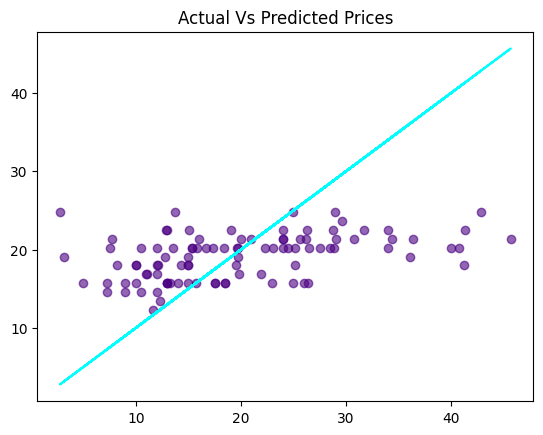

In [55]:
# Actual Vs Predicted Earnings
plt.figure(dpi=100)
plt.title(label="Actual Vs Predicted Earnings")
plt.xlabel = "Actual Earnings per hour"
plt.ylabel = "Predicted Values per hour"
plt.plot(
    y_test,
    y_test,
    color = "cyan",
    label = "Actual Values"
)
plt.scatter(
    x = y_test,
    y = y_pred,
    label = "Predicted Values",
    c='indigo',
    alpha=0.6
)


plt.show()

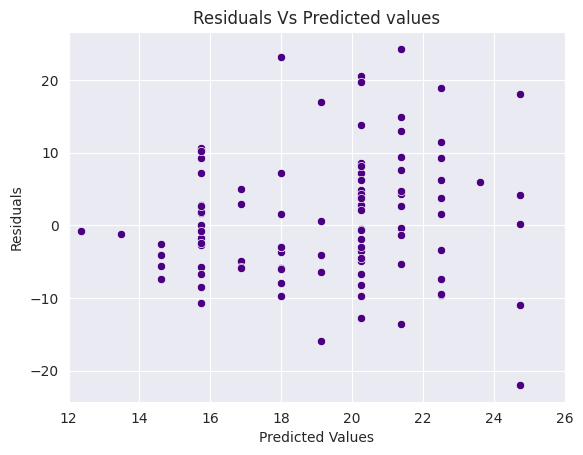

In [254]:
# Residuals Vs Predicted Values
with sns.axes_style("darkgrid"):
    sns.scatterplot(
        x = y_pred,
        y = s_residuals,
        color = "indigo"
    )
plt.title("Residuals Vs Predicted values")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.xlim(12,26)
plt.show()

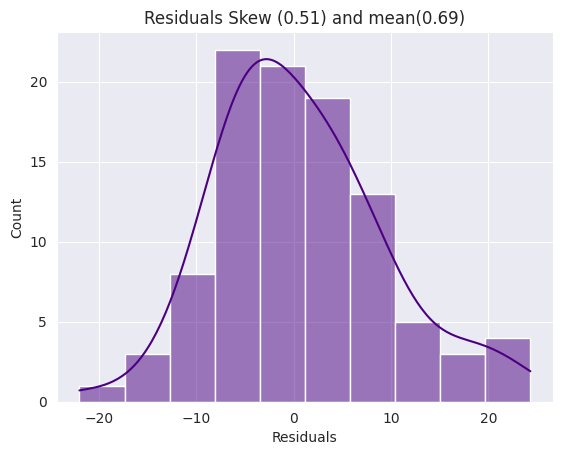

In [ ]:
# Plotting the Residuals
s_residuals_mean = round(s_residuals.mean(), 2)
s_residuals_skew = round(s_residuals.skew(), 2)

with sns.axes_style("darkgrid"):
    sns.histplot(
        s_residuals,
        kde=True,
        color="indigo"
    )
plt.title(f"Residuals Skew ({s_residuals_skew}) and mean({s_residuals_mean})")
plt.xlabel("Residuals")
plt.show()

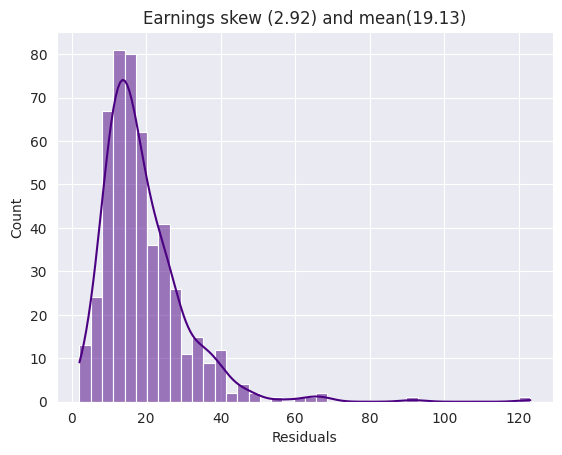

In [ ]:
# Plotting the Earnings Series
earnings_mean = round(clean_df.EARNINGS.mean(), 2)
earnings_skew = round(clean_df.EARNINGS.skew(), 2)
with sns.axes_style("darkgrid"):
    sns.histplot(
        clean_df.EARNINGS,
        kde=True,
        color="indigo"
    )

plt.title(f"Earnings skew ({earnings_skew}) and mean({earnings_mean})")
plt.xlabel("Residuals")

plt.show()

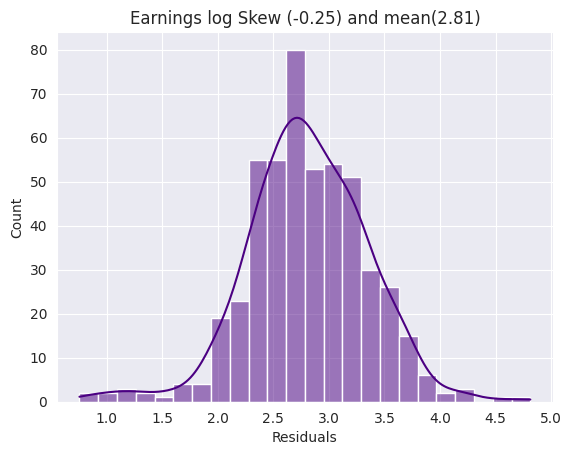

In [ ]:
# Plotting the log of the Earnings Series
arnings_log  = np.log(clean_df.EARNINGS)
earnings_log_mean = round(earnings_log.mean(), 2)
earnings_log_skew = round(earnings_log.skew(), 2)
with sns.axes_style("darkgrid"):
    sns.histplot(
        earnings_log,
        kde=True,
        color="indigo"
    )

plt.title(f"Earnings log Skew ({earnings_log_skew}) and mean({earnings_log_mean})")
plt.xlabel("Residuals")

plt.show()

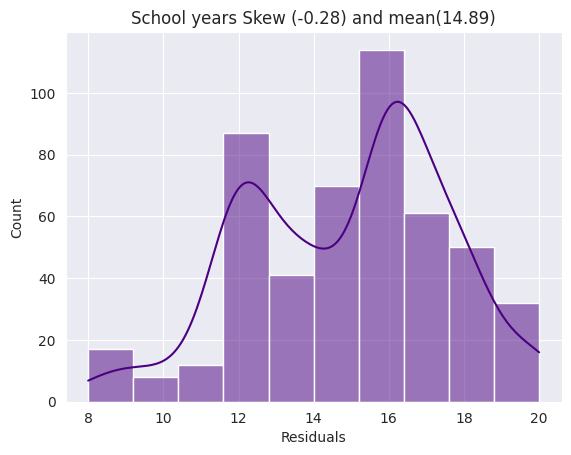

In [ ]:
# Plotting the number of School years
s_mean = round(clean_df.S.mean(), 2)
s_skew = round(clean_df.S.skew(), 2)

with sns.axes_style("darkgrid"):
    sns.histplot(
        clean_df.S,
        kde=True,
        color="indigo"
    )
plt.title(f"School years Skew ({s_skew}) and mean({s_mean})")
plt.xlabel("Residuals")
plt.show()

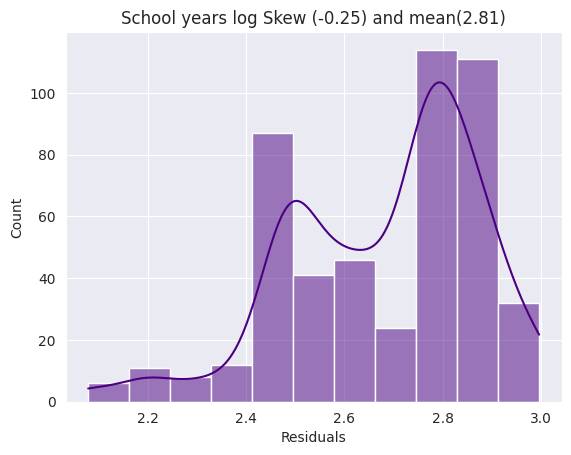

In [ ]:
# Plotting the log of the number of years of schooling
s_log  = np.log(clean_df.S)
s_log_mean = round(earnings_log.mean(), 2)
s_log_skew = round(earnings_log.skew(), 2)
with sns.axes_style("darkgrid"):
    sns.histplot(
        s_log,
        kde=True,
        color="indigo"
    )

plt.title(f"School years log Skew ({s_log_skew}) and mean({s_log_mean})")
plt.xlabel("Residuals")

plt.show()

### Summary
In the analysis above the EARNINGS serires as well as the S series when plotted are not normally distributed with their mean and skewness not close to 0.

A log transformations carried out on both of the series in order to improve the model. 

Other transformations like square root or reciprocal can also be used, but for this log transformation is used.

# OVERVIEW
The residuals are in a random state and there is no existence of systemic bias in our models.

When the residuals are plotted on histogram, it is normally distributed with its mean and skewness close to zero which is desirable and shows homoscedasticity.
However there isn't a clear positive correlation between S and EARNINGS.

In data analysis we must not come to a conclusion, rather create a question we seek to answer, state our hypothesis, test the model created and give valid non-bias results based on our findings.

The r-squared value of 0.16 is not the best and this model may not be the best in terms of determining the rate of hourly earnings.

Although, it might just be the fact that the number of years spent in school is not a great predictor of the hourly earnings of people.




# Multivariable Regression

Now use both years of schooling and the years work experience to predict earnings. How high is the r-squared for the regression on the training data? 

In [245]:
# Creating the features and target variables
features = (clean_df[["S","EXP"]])
target = (clean_df.EARNINGS)

In [246]:
# Splitting the data sets
multi_X_train, multi_X_test, multi_y_train, multi_y_test = train_test_split(
    features,
    target,
    test_size=0.2,
    random_state=10
)

In [247]:
# Initialisation of the regression object
regression = LinearRegression()

In [248]:
# Training the model
regression.fit(multi_X_train, multi_y_train)

LinearRegression()

In [249]:
# Getting the predicted values and subtracting that from the actual to get the residuals
predicted_values = regression.predict(multi_X_test)
residuals = multi_y_test - predicted_values

In [250]:
# The model Coefficients
print(f" Coefficients: {'{:.2f}'.format(regression.coef_[0])},  {'{:.2f}'.format(regression.coef_[1])}")
# The R-squared of the model
print(f" The rsquared of the model is: {'%.2f' % r2_score(multi_y_test, predicted_values)}")
# The Mean Squared Error of the model
print(f" Mean squared error: { '%.2f' % mean_squared_error(multi_y_test, predicted_values)} ")

 Coefficients: 1.67,  0.90
 The rsquared of the model is: 0.22
 Mean squared error: 70.78 


### Evaluating the model Coefficients.

In [211]:
print(regression.coef_)
print(f"The Coffecients suggest that with every increase in the years of schooling the hourly rate of pay increases by ${'{:.2f}'.format(regression.coef_[0])} and with every increase in the amount out of school work experience the hourly rate of pay increases by ${'{:.2f}'.format(regression.coef_[1])}")

[1.66850097 0.90050307]
The Coffecients suggest that with every increase in the years of schooling the hourly rate of pay increases by $1.67 and with every increase in the amount out of school work experience the hourly rate of pay increases by $0.90


### Analyse the Estimated Values & Regression Residuals

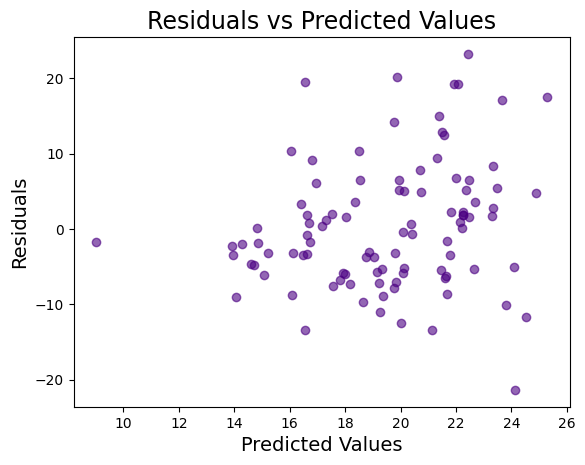

In [452]:
# Residuals vs Predicted values
plt.figure(dpi=100)
plt.title('Residuals vs Predicted Values', fontsize=17)

plt.scatter(
    x=predicted_values, 
    y=residuals, 
    c='indigo', 
    alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)

plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)

plt.show()

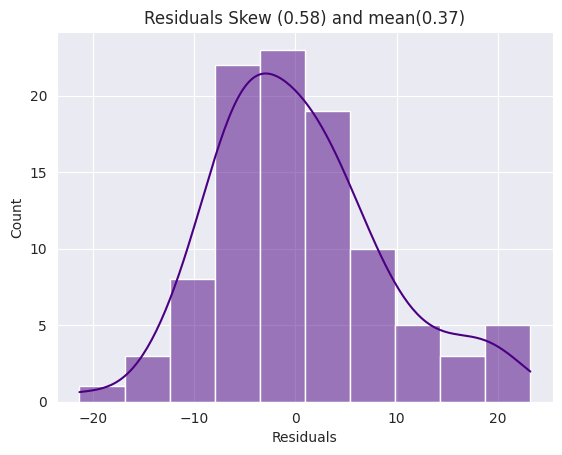

In [266]:
# Plotting the Residuals 
residuals_mean = round(residuals.mean(), 2)
residuals_skew = round(residuals.skew(), 2)

with sns.axes_style("darkgrid"):
    sns.histplot(
        residuals,
        kde=True,
        color="indigo"
    )
plt.title(f"Residuals Skew ({residuals_skew}) and mean({residuals_mean})")
plt.xlabel("Residuals")
plt.show()

### When the residuals are plotted on histogram, it is fairly normally distributed with its mean and skewness close to zero which is desirable and it leans towards homoscedasticity.

# Use Your Model to Make a Prediction

How much can someone with a bachelors degree (12 + 4) years of schooling and 5 years work experience expect to earn in 2011?

In [262]:
# The test data frame
test_pred_df = pd.DataFrame(data=[[16,5]], columns=[["S", "EXP"]])

In [263]:
test_pred_df.head()

,S,EXP
0,16,5


In [264]:
# Make prediction
earnings_estimate = regression.predict(test_pred_df)[0]

print(f"The hourly earnings rate is estimated to be ${'{:.2f}'.format(earnings_estimate)} per hour.")

The hourly earnings rate is estimated to be $20.08 per hour.


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

